# Strong business tester

This notebook tries to test if a business is strong based on some financial parameters:

* Strong free cash flow
* Strong balance sheet

In [1]:
import matplotlib.pyplot as plt

In [2]:
from yahooquery import Ticker

In [3]:
ticker = Ticker('adbe')

## Cash flow analysis

In [4]:
cash_flow = ticker.cash_flow()

In [5]:
type(cash_flow)

pandas.core.frame.DataFrame

In [6]:
cash_flow.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'BeginningCashPosition',
       'CapitalExpenditure', 'CashFlowFromContinuingFinancingActivities',
       'CashFlowFromContinuingInvestingActivities',
       'CashFlowFromContinuingOperatingActivities', 'ChangeInAccountPayable',
       'ChangeInAccruedExpense', 'ChangeInCashSupplementalAsReported',
       'ChangeInIncomeTaxPayable', 'ChangeInOtherWorkingCapital',
       'ChangeInPayable', 'ChangeInPayablesAndAccruedExpense',
       'ChangeInPrepaidAssets', 'ChangeInReceivables', 'ChangeInTaxPayable',
       'ChangeInWorkingCapital', 'ChangesInAccountReceivables',
       'ChangesInCash', 'CommonStockIssuance', 'CommonStockPayments',
       'DeferredIncomeTax', 'DeferredTax', 'Depreciation',
       'DepreciationAmortizationDepletion', 'DepreciationAndAmortization',
       'EffectOfExchangeRateChanges', 'EndCashPosition', 'FinancingCashFlow',
       'FreeCashFlow', 'GainLossOnSaleOfPPE', 'IncomeTaxPaidSupplementalData',
       'InterestPaid

In [7]:
cash_flow[['asOfDate', 'FreeCashFlow']].style.format({
    'FreeCashFlow': '{:,.2f}'.format,
})

,asOfDate,FreeCashFlow
symbol,,
adbe,2019-11-30 00:00:00,"4,087,333,000.00"
adbe,2020-11-30 00:00:00,"5,308,000,000.00"
adbe,2021-11-30 00:00:00,"6,893,000,000.00"
adbe,2022-11-30 00:00:00,"7,396,000,000.00"
adbe,2022-11-30 00:00:00,"7,396,000,000.00"
adbe,2023-02-28 00:00:00,"7,319,000,000.00"


### Free cash flow

In [8]:
free_cash_flow = cash_flow[['asOfDate', 'FreeCashFlow']]
free_cash_flow = free_cash_flow.set_index('asOfDate')

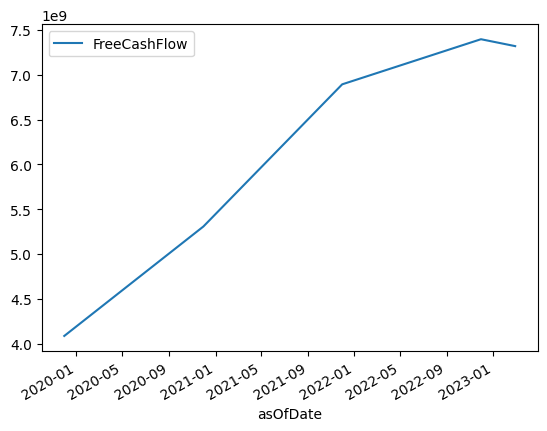

In [9]:
free_cash_flow.plot();

## Balance sheet analysis

In [10]:
balance_sheet = ticker.balance_sheet(frequency='Quarterly')

In [11]:
type(balance_sheet)

pandas.core.frame.DataFrame

In [12]:
balance_sheet.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AccountsPayable',
       'AccountsReceivable', 'AccumulatedDepreciation',
       'AdditionalPaidInCapital', 'AllowanceForDoubtfulAccountsReceivable',
       'BuildingsAndImprovements', 'CapitalLeaseObligations', 'CapitalStock',
       'CashAndCashEquivalents', 'CashCashEquivalentsAndShortTermInvestments',
       'CashEquivalents', 'CashFinancial', 'CommonStock', 'CommonStockEquity',
       'ConstructionInProgress', 'CurrentAccruedExpenses', 'CurrentAssets',
       'CurrentCapitalLeaseObligation', 'CurrentDebt',
       'CurrentDebtAndCapitalLeaseObligation', 'CurrentDeferredLiabilities',
       'CurrentDeferredRevenue', 'CurrentLiabilities',
       'GainsLossesNotAffectingRetainedEarnings', 'Goodwill',
       'GoodwillAndOtherIntangibleAssets', 'GrossAccountsReceivable',
       'GrossPPE', 'IncomeTaxPayable', 'InterestPayable', 'InvestedCapital',
       'LandAndImprovements', 'Leases', 'LongTermCapitalLeaseObligation',
       'LongTermDe

### Debt vs Equity

In [13]:
debt_vs_equity = balance_sheet[['asOfDate', 'TotalDebt', 'CommonStockEquity']]
debt_vs_equity = debt_vs_equity.set_index('asOfDate')

In [14]:
debt_vs_equity.style.format({
    'TotalDebt': '{:,.2f}'.format,    
    'CommonStockEquity': '{:,.2f}'.format,
})

,TotalDebt,CommonStockEquity
asOfDate,,
2022-02-28 00:00:00,"4,665,000,000.00","13,775,000,000.00"
2022-05-31 00:00:00,"4,658,000,000.00","13,985,000,000.00"
2022-08-31 00:00:00,"4,641,000,000.00","14,373,000,000.00"
2022-11-30 00:00:00,"4,633,000,000.00","14,051,000,000.00"
2023-02-28 00:00:00,"4,126,000,000.00","14,206,000,000.00"


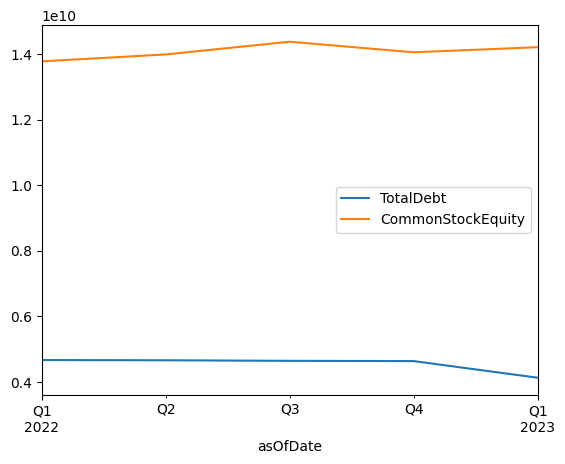

In [15]:
debt_vs_equity.plot();

### Debt/Equity ratio

In [16]:
balance_sheet['TotalDebt/CommonStockEquity']=balance_sheet['TotalDebt']/balance_sheet['CommonStockEquity']

debt_equity_ratio = balance_sheet[['asOfDate', 'TotalDebt/CommonStockEquity']]
debt_equity_ratio = debt_equity_ratio.set_index('asOfDate')

In [17]:
debt_equity_ratio.style.format({
    'TotalDebt/CommonStockEquity': '{:,.2%}'.format
})

,TotalDebt/CommonStockEquity
asOfDate,
2022-02-28 00:00:00,33.87%
2022-05-31 00:00:00,33.31%
2022-08-31 00:00:00,32.29%
2022-11-30 00:00:00,32.97%
2023-02-28 00:00:00,29.04%


In [18]:
debt_equity_ratio.index

DatetimeIndex(['2022-02-28', '2022-05-31', '2022-08-31', '2022-11-30',
               '2023-02-28'],
              dtype='datetime64[ns]', name='asOfDate', freq=None)

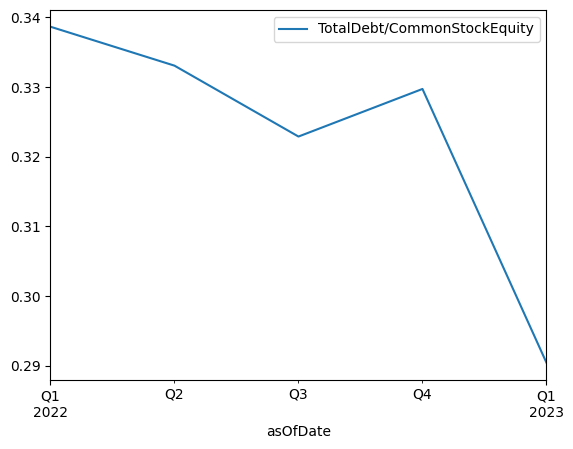

In [19]:
debt_equity_ratio.plot();